In [15]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
import time
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.externals import joblib
from sklearn.ensemble import GradientBoostingClassifier 
from keras.utils import to_categorical
from keras.layers import Dense, Activation, Flatten, Input,Dropout
from keras.layers import BatchNormalization
from keras.models import Model
from keras import initializers
from keras.optimizers import Adam
%run ../lib/load.py

C:\Users\rui\Anaconda3\envs\data\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)
Using TensorFlow backend.
C:\Users\rui\Anaconda3\envs\data\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\rui\Anaconda3\envs\data\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it

In [12]:
path = 'C:/Users/rui/Desktop/train_set/'
data = load.load_data(path+'label.csv')
points_path = 'C:/Users/rui/Desktop/train_set/points/'
X = load.load_points(points_path,data)
y = data['emotion_idx']

--- 23.873502731323242 seconds ---


In [13]:
train_x,test_x,train_y,test_y=train_test_split(X,y,test_size=0.2,random_state=123)

## GBM (baseline)

### Calculating Accuracy Rate

In [21]:
start_time = time.time()
gbmtree_model = GradientBoostingClassifier(max_depth = 1).fit(train_x,train_y) 
print("--- %s seconds ---" % (time.time() - start_time))

--- 1308.2316908836365 seconds ---


In [24]:
gbm_predictions = gbmtree_model.predict(test_x)
gbm_predictions = [round(value) for value in gbm_predictions]
gbm_accuracy = np.mean(test_y==gbm_predictions)
print("Accuracy: %.2f%%" % (gbm_accuracy *  100.0))

Accuracy: 39.60%


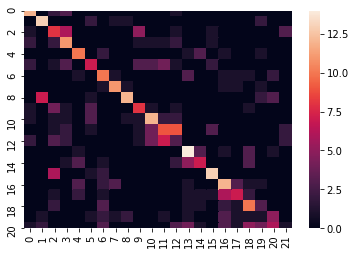

In [27]:
gbm_predictions = gbmtree_model.predict(test_x) 
cn = confusion_matrix(test_y,gbm_predictions)
sns.heatmap(cn)

In [28]:
print(classification_report(test_y,gbm_predictions))

              precision    recall  f1-score   support

           1       0.55      0.67      0.60        18
           2       0.57      0.68      0.62        19
           3       0.24      0.32      0.27        25
           4       0.35      0.52      0.42        21
           5       0.50      0.56      0.53        18
           6       0.32      0.27      0.29        26
           7       0.37      0.50      0.43        20
           8       0.65      0.69      0.67        16
           9       0.71      0.48      0.57        25
          10       0.35      0.40      0.37        20
          11       0.48      0.50      0.49        24
          12       0.38      0.28      0.32        32
          13       0.12      0.12      0.12        24
          14       0.45      0.61      0.52        23
          15       0.44      0.32      0.37        22
          16       0.62      0.59      0.60        22
          17       0.40      0.46      0.43        26
          18       0.47    

### Saving GBM Model

In [ ]:
#gbmtree_model_final = GradientBoostingClassifier(max_depth = 1).fit(X,y) 

In [43]:
#joblib.dump(gbmtree_model_final,'../output/gbm_base.m')

## Neural Network (advanced)

### Build Model

In [16]:
Y = to_categorical(y)
Y = Y[:,1:]

In [22]:
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=123)

In [17]:
input_shape = [6006] 
input_layer = Input(input_shape)
x = BatchNormalization()(input_layer) 
x = Dense(96,activation='relu',kernel_initializer=initializers.glorot_normal(seed=None))(x)
x = Dropout(0.5)(x)
x = BatchNormalization()(x) 
x = Dense(16,activation='relu',kernel_initializer=initializers.glorot_normal(seed=None))(x)
x = Dropout(0.5)(x)
output_layer = Dense(22,activation='softmax',kernel_initializer=initializers.glorot_normal(seed=None))(x) 
model = Model(input_layer,output_layer)

Instructions for updating:
Colocations handled automatically by placer.


### Calculating Accuracy Rate

In [21]:
start_time = time.time()
model.compile(loss='categorical_crossentropy',optimizer = Adam(lr=0.01),metrics=['accuracy'])
model.fit(X_train,y_train, validation_data=[X_test,y_test],epochs=50, batch_size=300)
# print('lr=0.01, train complete')
model.compile(loss='categorical_crossentropy',optimizer = Adam(lr=0.001),metrics=['accuracy'])
model.fit(X_train,y_train, validation_data=[X_test,y_test],epochs=200, batch_size=250)
# print('lr=0.001, train complete')
model.compile(loss='categorical_crossentropy',optimizer = Adam(lr=0.0001),metrics=['accuracy'])
model.fit(X_train,y_train, validation_data=[X_test,y_test],epochs=200, batch_size=200)
# print('lr=0.0001, train complete')
model.compile(loss='categorical_crossentropy',optimizer = Adam(lr=0.00001),metrics=['accuracy'])
model.fit(X_train,y_train, validation_data=[X_test,y_test],epochs=200, batch_size=200)
# print('lr=0.00001, train complete')
model.compile(loss='categorical_crossentropy',optimizer = Adam(lr=0.001),metrics=['accuracy'])
model.fit(X_train,y_train, validation_data=[X_test,y_test],epochs=200, batch_size=250)
# print('lr=0.001, train complete')
model.compile(loss='categorical_crossentropy',optimizer = Adam(lr=0.0001),metrics=['accuracy'])
model.fit(X_train,y_train, validation_data=[X_test,y_test],epochs=200, batch_size=200)
# print('lr=0.0001, train complete')
model.compile(loss='categorical_crossentropy',optimizer = Adam(lr=0.00001),metrics=['accuracy'])
model.fit(X_train,y_train, validation_data=[X_test,y_test],epochs=50, batch_size=200)
# print('lr=0.00001, train complete')
print("--- %s seconds ---" % (time.time() - start_time))

Train on 2000 samples, validate on 500 samples
Epoch 1/50
2000/2000 [==============================] - 2s 759us/step - loss: 1.7561 - accuracy: 0.3625 - val_loss: 1.5734 - val_accuracy: 0.4220
Epoch 2/50
2000/2000 [==============================] - 1s 292us/step - loss: 1.7893 - accuracy: 0.3565 - val_loss: 1.5512 - val_accuracy: 0.4340
Epoch 3/50
2000/2000 [==============================] - 1s 278us/step - loss: 1.7743 - accuracy: 0.3790 - val_loss: 1.5497 - val_accuracy: 0.4560
Epoch 4/50
2000/2000 [==============================] - 1s 305us/step - loss: 1.7520 - accuracy: 0.3765 - val_loss: 1.5566 - val_accuracy: 0.4540
Epoch 5/50
2000/2000 [==============================] - 1s 306us/step - loss: 1.7050 - accuracy: 0.3865 - val_loss: 1.5210 - val_accuracy: 0.4440
Epoch 6/50
2000/2000 [==============================] - 1s 291us/step - loss: 1.7124 - accuracy: 0.3780 - val_loss: 1.5080 - val_accuracy: 0.4620
Epoch 7/50
2000/2000 [==============================] - 1s 305us/step - loss:

2000/2000 [==============================] - 1s 308us/step - loss: 1.3305 - accuracy: 0.5000 - val_loss: 1.4536 - val_accuracy: 0.5220
Epoch 7/200
2000/2000 [==============================] - 1s 301us/step - loss: 1.3222 - accuracy: 0.4980 - val_loss: 1.4504 - val_accuracy: 0.5320
Epoch 8/200
2000/2000 [==============================] - 1s 304us/step - loss: 1.2939 - accuracy: 0.5170 - val_loss: 1.4518 - val_accuracy: 0.5380
Epoch 9/200
2000/2000 [==============================] - 1s 306us/step - loss: 1.3366 - accuracy: 0.4915 - val_loss: 1.4551 - val_accuracy: 0.5380
Epoch 10/200
2000/2000 [==============================] - 1s 311us/step - loss: 1.3033 - accuracy: 0.5080 - val_loss: 1.4540 - val_accuracy: 0.5380
Epoch 11/200
2000/2000 [==============================] - 1s 304us/step - loss: 1.2833 - accuracy: 0.5235 - val_loss: 1.4589 - val_accuracy: 0.5340
Epoch 12/200
2000/2000 [==============================] - 1s 301us/step - loss: 1.2804 - accuracy: 0.5240 - val_loss: 1.4619 - v

2000/2000 [==============================] - 1s 311us/step - loss: 1.2349 - accuracy: 0.5435 - val_loss: 1.5171 - val_accuracy: 0.5200
Epoch 62/200
2000/2000 [==============================] - 1s 299us/step - loss: 1.1852 - accuracy: 0.5585 - val_loss: 1.5279 - val_accuracy: 0.5300
Epoch 63/200
2000/2000 [==============================] - 1s 301us/step - loss: 1.2180 - accuracy: 0.5360 - val_loss: 1.5428 - val_accuracy: 0.5240
Epoch 64/200
2000/2000 [==============================] - 1s 296us/step - loss: 1.2515 - accuracy: 0.5375 - val_loss: 1.5474 - val_accuracy: 0.5240
Epoch 65/200
2000/2000 [==============================] - 1s 282us/step - loss: 1.2284 - accuracy: 0.5315 - val_loss: 1.5383 - val_accuracy: 0.5300
Epoch 66/200
2000/2000 [==============================] - 1s 318us/step - loss: 1.2160 - accuracy: 0.5470 - val_loss: 1.5379 - val_accuracy: 0.5160
Epoch 67/200
2000/2000 [==============================] - 1s 303us/step - loss: 1.2147 - accuracy: 0.5475 - val_loss: 1.5266 

2000/2000 [==============================] - 1s 301us/step - loss: 1.1308 - accuracy: 0.5900 - val_loss: 1.6087 - val_accuracy: 0.5220
Epoch 117/200
2000/2000 [==============================] - 1s 298us/step - loss: 1.1359 - accuracy: 0.5775 - val_loss: 1.6061 - val_accuracy: 0.5240
Epoch 118/200
2000/2000 [==============================] - 1s 286us/step - loss: 1.1658 - accuracy: 0.5640 - val_loss: 1.5958 - val_accuracy: 0.5260
Epoch 119/200
2000/2000 [==============================] - 1s 299us/step - loss: 1.1717 - accuracy: 0.5555 - val_loss: 1.6073 - val_accuracy: 0.5300
Epoch 120/200
2000/2000 [==============================] - 1s 294us/step - loss: 1.1380 - accuracy: 0.5790 - val_loss: 1.6058 - val_accuracy: 0.5280
Epoch 121/200
2000/2000 [==============================] - 1s 297us/step - loss: 1.1443 - accuracy: 0.5590 - val_loss: 1.6118 - val_accuracy: 0.5420
Epoch 122/200
2000/2000 [==============================] - 1s 299us/step - loss: 1.1378 - accuracy: 0.5725 - val_loss: 1

2000/2000 [==============================] - 1s 302us/step - loss: 1.1151 - accuracy: 0.5815 - val_loss: 1.7607 - val_accuracy: 0.5160
Epoch 172/200
2000/2000 [==============================] - 1s 306us/step - loss: 1.1323 - accuracy: 0.5725 - val_loss: 1.7682 - val_accuracy: 0.5100
Epoch 173/200
2000/2000 [==============================] - 1s 320us/step - loss: 1.1019 - accuracy: 0.5740 - val_loss: 1.7939 - val_accuracy: 0.5080
Epoch 174/200
2000/2000 [==============================] - 1s 302us/step - loss: 1.1175 - accuracy: 0.5705 - val_loss: 1.7847 - val_accuracy: 0.5200
Epoch 175/200
2000/2000 [==============================] - 1s 301us/step - loss: 1.1306 - accuracy: 0.5840 - val_loss: 1.7600 - val_accuracy: 0.5200
Epoch 176/200
2000/2000 [==============================] - 1s 302us/step - loss: 1.0970 - accuracy: 0.5845 - val_loss: 1.7403 - val_accuracy: 0.5400
Epoch 177/200
2000/2000 [==============================] - 1s 288us/step - loss: 1.1396 - accuracy: 0.5815 - val_loss: 1

Epoch 26/200
2000/2000 [==============================] - 1s 323us/step - loss: 1.0888 - accuracy: 0.5880 - val_loss: 1.7933 - val_accuracy: 0.5360
Epoch 27/200
2000/2000 [==============================] - 1s 340us/step - loss: 1.1027 - accuracy: 0.5900 - val_loss: 1.7916 - val_accuracy: 0.5340
Epoch 28/200
2000/2000 [==============================] - 1s 353us/step - loss: 1.1265 - accuracy: 0.5785 - val_loss: 1.7898 - val_accuracy: 0.5340
Epoch 29/200
2000/2000 [==============================] - 1s 333us/step - loss: 1.1022 - accuracy: 0.5825 - val_loss: 1.7883 - val_accuracy: 0.5340
Epoch 30/200
2000/2000 [==============================] - 1s 313us/step - loss: 1.1183 - accuracy: 0.5795 - val_loss: 1.7879 - val_accuracy: 0.5340
Epoch 31/200
2000/2000 [==============================] - 1s 317us/step - loss: 1.0678 - accuracy: 0.5955 - val_loss: 1.7879 - val_accuracy: 0.5340
Epoch 32/200
2000/2000 [==============================] - 1s 318us/step - loss: 1.1354 - accuracy: 0.5775 - val_

2000/2000 [==============================] - 1s 288us/step - loss: 1.0913 - accuracy: 0.5955 - val_loss: 1.7962 - val_accuracy: 0.5260
Epoch 82/200
2000/2000 [==============================] - 1s 261us/step - loss: 1.0862 - accuracy: 0.5855 - val_loss: 1.7966 - val_accuracy: 0.5240
Epoch 83/200
2000/2000 [==============================] - 1s 305us/step - loss: 1.0889 - accuracy: 0.5920 - val_loss: 1.7999 - val_accuracy: 0.5240
Epoch 84/200
2000/2000 [==============================] - 1s 315us/step - loss: 1.0874 - accuracy: 0.5950 - val_loss: 1.8038 - val_accuracy: 0.5200
Epoch 85/200
2000/2000 [==============================] - 1s 290us/step - loss: 1.1171 - accuracy: 0.5955 - val_loss: 1.8057 - val_accuracy: 0.5200
Epoch 86/200
2000/2000 [==============================] - 1s 272us/step - loss: 1.0550 - accuracy: 0.6065 - val_loss: 1.8031 - val_accuracy: 0.5240
Epoch 87/200
2000/2000 [==============================] - 1s 265us/step - loss: 1.1032 - accuracy: 0.5800 - val_loss: 1.8032 

2000/2000 [==============================] - 1s 328us/step - loss: 1.1135 - accuracy: 0.5740 - val_loss: 1.8154 - val_accuracy: 0.5280
Epoch 137/200
2000/2000 [==============================] - 1s 338us/step - loss: 1.1080 - accuracy: 0.5880 - val_loss: 1.8138 - val_accuracy: 0.5300
Epoch 138/200
2000/2000 [==============================] - 1s 326us/step - loss: 1.0978 - accuracy: 0.5950 - val_loss: 1.8135 - val_accuracy: 0.5260
Epoch 139/200
2000/2000 [==============================] - 1s 331us/step - loss: 1.1340 - accuracy: 0.5745 - val_loss: 1.8135 - val_accuracy: 0.5300
Epoch 140/200
2000/2000 [==============================] - 1s 335us/step - loss: 1.0728 - accuracy: 0.5920 - val_loss: 1.8122 - val_accuracy: 0.5320
Epoch 141/200
2000/2000 [==============================] - 1s 334us/step - loss: 1.0478 - accuracy: 0.5985 - val_loss: 1.8110 - val_accuracy: 0.5300
Epoch 142/200
2000/2000 [==============================] - 1s 346us/step - loss: 1.1007 - accuracy: 0.5850 - val_loss: 1

2000/2000 [==============================] - 1s 404us/step - loss: 1.0809 - accuracy: 0.5920 - val_loss: 1.8117 - val_accuracy: 0.5240
Epoch 192/200
2000/2000 [==============================] - 1s 386us/step - loss: 1.0857 - accuracy: 0.5945 - val_loss: 1.8127 - val_accuracy: 0.5220
Epoch 193/200
2000/2000 [==============================] - 1s 382us/step - loss: 1.0966 - accuracy: 0.5980 - val_loss: 1.8118 - val_accuracy: 0.5240
Epoch 194/200
2000/2000 [==============================] - 1s 435us/step - loss: 1.0522 - accuracy: 0.5960 - val_loss: 1.8099 - val_accuracy: 0.5220
Epoch 195/200
2000/2000 [==============================] - 1s 384us/step - loss: 1.0936 - accuracy: 0.5820 - val_loss: 1.8104 - val_accuracy: 0.5220
Epoch 196/200
2000/2000 [==============================] - 1s 393us/step - loss: 1.0642 - accuracy: 0.5935 - val_loss: 1.8090 - val_accuracy: 0.5220
Epoch 197/200
2000/2000 [==============================] - 1s 435us/step - loss: 1.1061 - accuracy: 0.5875 - val_loss: 1

2000/2000 [==============================] - 1s 327us/step - loss: 1.0941 - accuracy: 0.5875 - val_loss: 1.8159 - val_accuracy: 0.5260
Epoch 47/200
2000/2000 [==============================] - 1s 330us/step - loss: 1.0901 - accuracy: 0.5975 - val_loss: 1.8157 - val_accuracy: 0.5240
Epoch 48/200
2000/2000 [==============================] - 1s 297us/step - loss: 1.0700 - accuracy: 0.6050 - val_loss: 1.8158 - val_accuracy: 0.5240
Epoch 49/200
2000/2000 [==============================] - 1s 330us/step - loss: 1.0549 - accuracy: 0.6020 - val_loss: 1.8169 - val_accuracy: 0.5240
Epoch 50/200
2000/2000 [==============================] - 1s 329us/step - loss: 1.0605 - accuracy: 0.6040 - val_loss: 1.8166 - val_accuracy: 0.5240
Epoch 51/200
2000/2000 [==============================] - 1s 327us/step - loss: 1.0585 - accuracy: 0.6100 - val_loss: 1.8179 - val_accuracy: 0.5260
Epoch 52/200
2000/2000 [==============================] - 1s 312us/step - loss: 1.0991 - accuracy: 0.6010 - val_loss: 1.8172 

2000/2000 [==============================] - 1s 335us/step - loss: 1.0985 - accuracy: 0.5950 - val_loss: 1.8137 - val_accuracy: 0.5240
Epoch 102/200
2000/2000 [==============================] - 1s 334us/step - loss: 1.0830 - accuracy: 0.5975 - val_loss: 1.8156 - val_accuracy: 0.5220
Epoch 103/200
2000/2000 [==============================] - 1s 346us/step - loss: 1.0618 - accuracy: 0.5935 - val_loss: 1.8157 - val_accuracy: 0.5220
Epoch 104/200
2000/2000 [==============================] - 1s 316us/step - loss: 1.0839 - accuracy: 0.6060 - val_loss: 1.8174 - val_accuracy: 0.5220
Epoch 105/200
2000/2000 [==============================] - 1s 323us/step - loss: 1.0846 - accuracy: 0.6055 - val_loss: 1.8167 - val_accuracy: 0.5220
Epoch 106/200
2000/2000 [==============================] - 1s 318us/step - loss: 1.0714 - accuracy: 0.6065 - val_loss: 1.8155 - val_accuracy: 0.5260
Epoch 107/200
2000/2000 [==============================] - 1s 330us/step - loss: 1.0920 - accuracy: 0.5925 - val_loss: 1

2000/2000 [==============================] - 1s 428us/step - loss: 1.0668 - accuracy: 0.6090 - val_loss: 1.8132 - val_accuracy: 0.5240
Epoch 157/200
2000/2000 [==============================] - 1s 383us/step - loss: 1.0917 - accuracy: 0.5885 - val_loss: 1.8139 - val_accuracy: 0.5240
Epoch 158/200
2000/2000 [==============================] - 1s 370us/step - loss: 1.0886 - accuracy: 0.5910 - val_loss: 1.8153 - val_accuracy: 0.5220
Epoch 159/200
2000/2000 [==============================] - 1s 338us/step - loss: 1.1118 - accuracy: 0.6000 - val_loss: 1.8183 - val_accuracy: 0.5220
Epoch 160/200
2000/2000 [==============================] - 1s 300us/step - loss: 1.0641 - accuracy: 0.5900 - val_loss: 1.8178 - val_accuracy: 0.5220
Epoch 161/200
2000/2000 [==============================] - 1s 312us/step - loss: 1.0697 - accuracy: 0.5975 - val_loss: 1.8186 - val_accuracy: 0.5220
Epoch 162/200
2000/2000 [==============================] - 1s 310us/step - loss: 1.0892 - accuracy: 0.5895 - val_loss: 1

Epoch 11/200
2000/2000 [==============================] - 1s 313us/step - loss: 1.0717 - accuracy: 0.6020 - val_loss: 1.8414 - val_accuracy: 0.5340
Epoch 12/200
2000/2000 [==============================] - 1s 302us/step - loss: 1.0837 - accuracy: 0.6025 - val_loss: 1.8404 - val_accuracy: 0.5360
Epoch 13/200
2000/2000 [==============================] - 1s 299us/step - loss: 1.0849 - accuracy: 0.5940 - val_loss: 1.8140 - val_accuracy: 0.5300
Epoch 14/200
2000/2000 [==============================] - 1s 321us/step - loss: 1.1132 - accuracy: 0.5790 - val_loss: 1.8110 - val_accuracy: 0.5280
Epoch 15/200
2000/2000 [==============================] - 1s 313us/step - loss: 1.1160 - accuracy: 0.5795 - val_loss: 1.8155 - val_accuracy: 0.5300
Epoch 16/200
2000/2000 [==============================] - 1s 314us/step - loss: 1.0622 - accuracy: 0.5885 - val_loss: 1.8278 - val_accuracy: 0.5200
Epoch 17/200
2000/2000 [==============================] - 1s 319us/step - loss: 1.0713 - accuracy: 0.5930 - val_

2000/2000 [==============================] - 1s 302us/step - loss: 1.0485 - accuracy: 0.6135 - val_loss: 1.8891 - val_accuracy: 0.5380
Epoch 67/200
2000/2000 [==============================] - 1s 286us/step - loss: 1.0180 - accuracy: 0.6195 - val_loss: 1.9037 - val_accuracy: 0.5340
Epoch 68/200
2000/2000 [==============================] - 1s 306us/step - loss: 1.0532 - accuracy: 0.6075 - val_loss: 1.9253 - val_accuracy: 0.5320
Epoch 69/200
2000/2000 [==============================] - 1s 306us/step - loss: 1.0614 - accuracy: 0.6135 - val_loss: 1.9041 - val_accuracy: 0.5360
Epoch 70/200
2000/2000 [==============================] - 1s 295us/step - loss: 1.0310 - accuracy: 0.6065 - val_loss: 1.8798 - val_accuracy: 0.5360
Epoch 71/200
2000/2000 [==============================] - 1s 303us/step - loss: 1.0677 - accuracy: 0.6015 - val_loss: 1.8673 - val_accuracy: 0.5380
Epoch 72/200
2000/2000 [==============================] - 1s 292us/step - loss: 1.0632 - accuracy: 0.6000 - val_loss: 1.8731 

2000/2000 [==============================] - 1s 301us/step - loss: 1.0414 - accuracy: 0.6095 - val_loss: 1.9766 - val_accuracy: 0.5140
Epoch 122/200
2000/2000 [==============================] - 1s 318us/step - loss: 1.0256 - accuracy: 0.6230 - val_loss: 1.9750 - val_accuracy: 0.5200
Epoch 123/200
2000/2000 [==============================] - 1s 303us/step - loss: 1.0071 - accuracy: 0.6115 - val_loss: 1.9752 - val_accuracy: 0.5220
Epoch 124/200
2000/2000 [==============================] - 1s 294us/step - loss: 1.0045 - accuracy: 0.6285 - val_loss: 1.9454 - val_accuracy: 0.5180
Epoch 125/200
2000/2000 [==============================] - 1s 300us/step - loss: 1.0215 - accuracy: 0.6205 - val_loss: 1.9201 - val_accuracy: 0.5220
Epoch 126/200
2000/2000 [==============================] - 1s 318us/step - loss: 1.0174 - accuracy: 0.6205 - val_loss: 1.9048 - val_accuracy: 0.5260
Epoch 127/200
2000/2000 [==============================] - 1s 299us/step - loss: 1.0072 - accuracy: 0.6300 - val_loss: 1

2000/2000 [==============================] - 1s 308us/step - loss: 0.9878 - accuracy: 0.6295 - val_loss: 2.0222 - val_accuracy: 0.5380
Epoch 177/200
2000/2000 [==============================] - 1s 309us/step - loss: 1.0108 - accuracy: 0.6240 - val_loss: 2.0262 - val_accuracy: 0.5360
Epoch 178/200
2000/2000 [==============================] - 1s 301us/step - loss: 1.0317 - accuracy: 0.6060 - val_loss: 2.0364 - val_accuracy: 0.5300
Epoch 179/200
2000/2000 [==============================] - 1s 294us/step - loss: 1.0081 - accuracy: 0.6265 - val_loss: 2.0570 - val_accuracy: 0.5260
Epoch 180/200
2000/2000 [==============================] - 1s 312us/step - loss: 1.0454 - accuracy: 0.6165 - val_loss: 2.0631 - val_accuracy: 0.5180
Epoch 181/200
2000/2000 [==============================] - 1s 317us/step - loss: 0.9894 - accuracy: 0.6270 - val_loss: 2.0564 - val_accuracy: 0.5320
Epoch 182/200
2000/2000 [==============================] - 1s 320us/step - loss: 1.0195 - accuracy: 0.6045 - val_loss: 2

2000/2000 [==============================] - 1s 424us/step - loss: 1.0120 - accuracy: 0.6235 - val_loss: 2.0357 - val_accuracy: 0.5240
Epoch 32/200
2000/2000 [==============================] - 1s 360us/step - loss: 0.9957 - accuracy: 0.6370 - val_loss: 2.0377 - val_accuracy: 0.5220
Epoch 33/200
2000/2000 [==============================] - 1s 330us/step - loss: 1.0232 - accuracy: 0.6285 - val_loss: 2.0389 - val_accuracy: 0.5180
Epoch 34/200
2000/2000 [==============================] - 1s 304us/step - loss: 1.0061 - accuracy: 0.6345 - val_loss: 2.0343 - val_accuracy: 0.5180
Epoch 35/200
2000/2000 [==============================] - 1s 317us/step - loss: 1.0127 - accuracy: 0.6315 - val_loss: 2.0362 - val_accuracy: 0.5160
Epoch 36/200
2000/2000 [==============================] - 1s 325us/step - loss: 1.0205 - accuracy: 0.6225 - val_loss: 2.0365 - val_accuracy: 0.5180
Epoch 37/200
2000/2000 [==============================] - 1s 321us/step - loss: 0.9868 - accuracy: 0.6385 - val_loss: 2.0372 

2000/2000 [==============================] - 1s 540us/step - loss: 0.9799 - accuracy: 0.6350 - val_loss: 2.0378 - val_accuracy: 0.5240
Epoch 87/200
2000/2000 [==============================] - 1s 484us/step - loss: 1.0172 - accuracy: 0.6310 - val_loss: 2.0371 - val_accuracy: 0.5260
Epoch 88/200
2000/2000 [==============================] - 1s 487us/step - loss: 0.9406 - accuracy: 0.6395 - val_loss: 2.0367 - val_accuracy: 0.5280
Epoch 89/200
2000/2000 [==============================] - 1s 481us/step - loss: 1.0149 - accuracy: 0.6240 - val_loss: 2.0354 - val_accuracy: 0.5300
Epoch 90/200
2000/2000 [==============================] - 1s 456us/step - loss: 1.0127 - accuracy: 0.6200 - val_loss: 2.0353 - val_accuracy: 0.5280
Epoch 91/200
2000/2000 [==============================] - 1s 457us/step - loss: 1.0169 - accuracy: 0.6245 - val_loss: 2.0356 - val_accuracy: 0.5300
Epoch 92/200
2000/2000 [==============================] - 1s 453us/step - loss: 0.9871 - accuracy: 0.6205 - val_loss: 2.0360 

2000/2000 [==============================] - 1s 439us/step - loss: 0.9688 - accuracy: 0.6400 - val_loss: 2.0456 - val_accuracy: 0.5280
Epoch 141/200
2000/2000 [==============================] - 1s 463us/step - loss: 0.9768 - accuracy: 0.6245 - val_loss: 2.0453 - val_accuracy: 0.5260
Epoch 142/200
2000/2000 [==============================] - 1s 462us/step - loss: 0.9895 - accuracy: 0.6215 - val_loss: 2.0443 - val_accuracy: 0.5280
Epoch 143/200
2000/2000 [==============================] - 1s 477us/step - loss: 1.0028 - accuracy: 0.6295 - val_loss: 2.0460 - val_accuracy: 0.5280
Epoch 144/200
2000/2000 [==============================] - 1s 481us/step - loss: 1.0256 - accuracy: 0.6190 - val_loss: 2.0486 - val_accuracy: 0.5280
Epoch 145/200
2000/2000 [==============================] - 1s 492us/step - loss: 0.9928 - accuracy: 0.6305 - val_loss: 2.0517 - val_accuracy: 0.5280
Epoch 146/200
2000/2000 [==============================] - 1s 443us/step - loss: 0.9906 - accuracy: 0.6075 - val_loss: 2

2000/2000 [==============================] - 1s 461us/step - loss: 1.0062 - accuracy: 0.6370 - val_loss: 2.0631 - val_accuracy: 0.5280
Epoch 196/200
2000/2000 [==============================] - 1s 466us/step - loss: 1.0081 - accuracy: 0.6130 - val_loss: 2.0633 - val_accuracy: 0.5280
Epoch 197/200
2000/2000 [==============================] - 1s 479us/step - loss: 0.9874 - accuracy: 0.6235 - val_loss: 2.0622 - val_accuracy: 0.5260
Epoch 198/200
2000/2000 [==============================] - 1s 447us/step - loss: 0.9884 - accuracy: 0.6345 - val_loss: 2.0639 - val_accuracy: 0.5260
Epoch 199/200
2000/2000 [==============================] - 1s 479us/step - loss: 0.9607 - accuracy: 0.6375 - val_loss: 2.0653 - val_accuracy: 0.5240
Epoch 200/200
2000/2000 [==============================] - 1s 466us/step - loss: 0.9767 - accuracy: 0.6345 - val_loss: 2.0652 - val_accuracy: 0.5240
Train on 2000 samples, validate on 500 samples
Epoch 1/50
2000/2000 [==============================] - 3s 2ms/step - los

2000/2000 [==============================] - 1s 506us/step - loss: 0.9812 - accuracy: 0.6365 - val_loss: 2.0592 - val_accuracy: 0.5320
--- 806.7281172275543 seconds ---


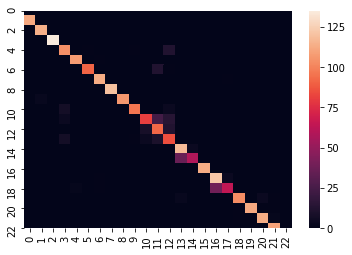

In [42]:
pred = model.predict(X_test)
pred = pred.argmax(axis=1)
cm = confusion_matrix(y_test,pred)
sns.heatmap(cm)

### Saving Neural Network Model

In [ ]:
#joblib.dump(model,'../output/nn.m')